<a href="https://colab.research.google.com/github/gaurav-kar-ji/Pic_geny_project/blob/main/picgeny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y diffusers transformers accelerate safetensors invisible-watermark peft xformers
!pip install torch==2.4.0 --index-url https://download.pytorch.org/whl/cu121
!pip install diffusers==0.29.2 transformers==4.40.2 accelerate==0.33.0 peft==0.11.1 safetensors invisible-watermark
!pip install xformers==0.0.27.post2 --index-url https://download.pytorch.org/whl/cu121

Found existing installation: diffusers 0.29.2
Uninstalling diffusers-0.29.2:
  Successfully uninstalled diffusers-0.29.2
Found existing installation: transformers 4.40.2
Uninstalling transformers-4.40.2:
  Successfully uninstalled transformers-4.40.2
Found existing installation: accelerate 0.33.0
Uninstalling accelerate-0.33.0:
  Successfully uninstalled accelerate-0.33.0
Found existing installation: safetensors 0.7.0
Uninstalling safetensors-0.7.0:
  Successfully uninstalled safetensors-0.7.0
Found existing installation: invisible-watermark 0.2.0
Uninstalling invisible-watermark-0.2.0:
  Successfully uninstalled invisible-watermark-0.2.0
Found existing installation: peft 0.11.1
Uninstalling peft-0.11.1:
  Successfully uninstalled peft-0.11.1
Found existing installation: xformers 0.0.27.post2
Uninstalling xformers-0.0.27.post2:
  Successfully uninstalled xformers-0.0.27.post2
Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached diffusers-0.29.2-py3-none-any.whl.met

In [2]:
import torch
from diffusers import DiffusionPipeline

torch.cuda.empty_cache()

base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"

base = DiffusionPipeline.from_pretrained(
    base_model_id,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)

base.enable_attention_slicing()
base.to("cuda")

/usr/local/lib/python3.12/dist-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/usr/local/lib/python3.12/dist-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [3]:
torch.cuda.empty_cache()

refiner_model_id = "stabilityai/stable-diffusion-xl-refiner-1.0"

refiner = DiffusionPipeline.from_pretrained(
    refiner_model_id,
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)

refiner.enable_attention_slicing()
refiner.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

StableDiffusionXLImg2ImgPipeline {
  "_class_name": "StableDiffusionXLImg2ImgPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-refiner-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": false,
  "image_encoder": [
    null,
    null
  ],
  "requires_aesthetics_score": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    null,
    null
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    null,
    null
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

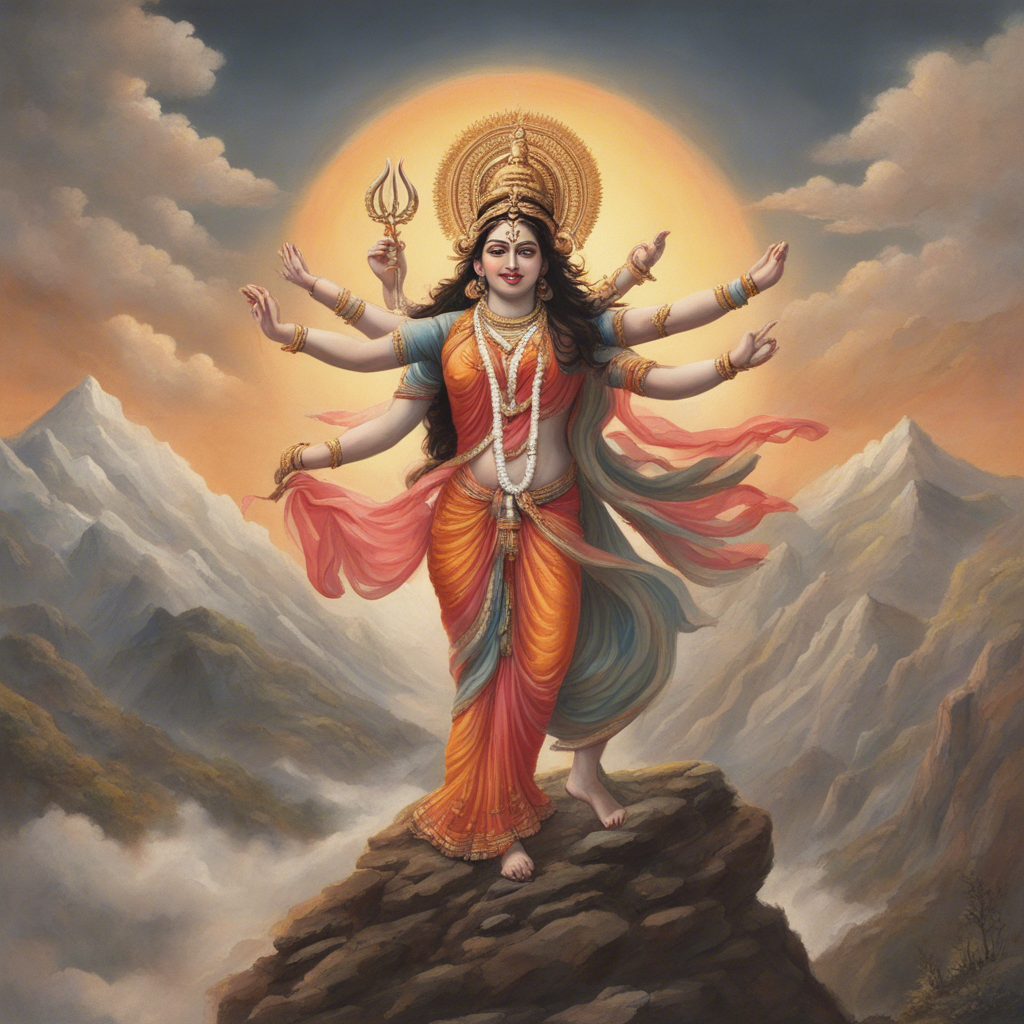

In [8]:
torch.cuda.empty_cache()

prompt = "Durga mata standing on top of mountain dancing with Shiva."
n_steps = 30
high_noise_frac = 0.8

base_latent = base(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent"
).images

final_image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=base_latent
).images[0]

final_image.save("lion_refined.png")
final_image

In [9]:
import gc
torch.cuda.empty_cache()
gc.collect()

139